# **Capítulo 5: Redes neuronales convolucionales**

## Clasificación de dígitos manuscritos usando la base de datos MNIST

Carga y preprocesado de datos

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Cargamos los datos
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalizamos las imágenes
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Redimensionamos de las imágenes para que
# tengan la forma (n_imágenes, 28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

11490434/11490434 [==============================] - 2s 0us/step


Visualización del aspecto de los datos

Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de test: 10000
Tamaño de las imágenes: (28, 28, 1)


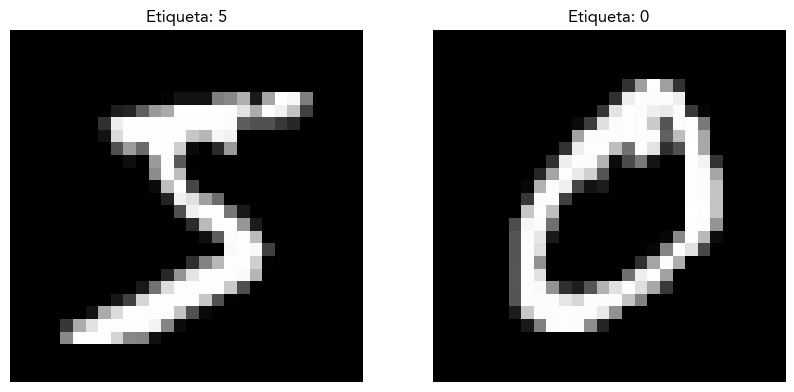

In [ ]:
import matplotlib.pyplot as plt

# Dimensiones de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
print(f'Tamaño del conjunto de test: {len(X_test)}')

# Obtenemos dos imágenes de entrenamiento
imagenes, etiquetas = X_train[:2], Y_train[:2]
print(f'Tamaño de las imágenes: {imagenes.shape[1:]}')

# Visualizamos las imágenes y etiquetas de un batch de entrenamiento
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
for i in range(2):
    axs[i].imshow(np.squeeze(imagenes[i]), cmap='gray')
    axs[i].set_title(f'Etiqueta: {etiquetas[i]}')
    axs[i].axis('off')
plt.show()

Implementación de la CNN a usar

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definimos el modelo
modelo = Sequential()
# 1) Bloque extractor de características
modelo.add(Conv2D(filters=6, kernel_size=5, padding='same',\
                  activation='relu', input_shape=(28, 28, 1)))
modelo.add(MaxPooling2D(pool_size=2))
modelo.add(Conv2D(filters=16, kernel_size=5, padding='same',\
                  activation='relu'))
modelo.add(MaxPooling2D(pool_size=2))
# 2) Bloque clasificador de características
modelo.add(Flatten())
modelo.add(Dense(units=120, activation='relu'))
modelo.add(Dense(units=84, activation='relu'))
modelo.add(Dense(units=10, activation='softmax'))

# Resumen del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               9

Compilación de la CNN

In [ ]:
modelo.compile(optimizer='adam',\
               loss='sparse_categorical_crossentropy',\
               metrics=['accuracy'])

Entrenamiento y test de la CNN con el conjunto de datos MNIST

In [ ]:
historia = modelo.fit(X_train, Y_train,\
           validation_data=(X_test, Y_test),\
           epochs=15, batch_size=64, verbose=2)

Epoch 1/15
938/938 - 16s - loss: 0.2213 - accuracy: 0.9323 - val_loss: 0.0717 - val_accuracy: 0.9755 - 16s/epoch - 17ms/step
Epoch 2/15
938/938 - 4s - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0477 - val_accuracy: 0.9843 - 4s/epoch - 4ms/step
Epoch 3/15
938/938 - 4s - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0397 - val_accuracy: 0.9871 - 4s/epoch - 4ms/step
Epoch 4/15
938/938 - 6s - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0348 - val_accuracy: 0.9888 - 6s/epoch - 7ms/step
Epoch 5/15
938/938 - 6s - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0433 - val_accuracy: 0.9863 - 6s/epoch - 7ms/step
Epoch 6/15
938/938 - 5s - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0404 - val_accuracy: 0.9865 - 5s/epoch - 6ms/step
Epoch 7/15
938/938 - 6s - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0354 - val_accuracy: 0.9880 - 6s/epoch - 6ms/step
Epoch 8/15
938/938 - 4s - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0367 - val_accuracy: 0.9893 - 4s/epoch - 4ms/step
Epoch 9/15
938/938 - 

Creación de una gráfica que muestre el progreso del rendimiento del modelo

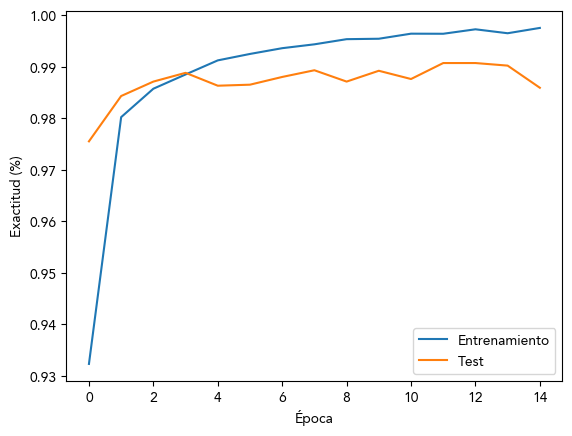

In [ ]:
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.xlabel('Época')         # Eje X - Época
plt.ylabel('Exactitud (%)') # Eje Y - Exactitud
plt.legend(['Entrenamiento', 'Test'])
plt.show()

Guardado del modelo

In [ ]:
modelo.save('modelo_cap_5.h5')

Comprobación de la exactitud del modelo guardado sobre el conjunto de test

In [3]:
from tensorflow.keras.models import load_model

modelo = load_model('modelo_cap_5.h5')
metricas = modelo.evaluate(X_test, Y_test, verbose=0, return_dict=True)
for k, v in metricas.items():
    print(f'{k}: {v:.4f}')

loss: 0.0564
accuracy: 0.9859
